In [3]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [7]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

            level_0  index        High         Low        Open       Close  \
Date                                                                         
2019-12-31        0      0  421.290009  402.079987  405.000000  418.329987   
2020-01-02        1      1  430.700012  421.709991  424.500000  430.260010   
2020-01-03        2      2  454.000000  436.920013  440.500000  443.010010   
2020-01-06        3      3  451.559998  440.000000  440.470001  451.540009   
2020-01-07        4      4  471.630005  453.359985  461.399994  469.059998   

              Volume   Adj Close       100ma  
Date                                          
2019-12-31  10285700  418.329987  418.329987  
2020-01-02   9532100  430.260010  424.294998  
2020-01-03  17778500  443.010010  430.533335  
2020-01-06  10133000  451.540009  435.785004  
2020-01-07  17882100  469.059998  442.440002  


            level_0  index        High         Low        Open       Close  \
Date                                                                         
2019-12-31        0      0  421.290009  402.079987  405.000000  418.329987   
2020-01-02        1      1  430.700012  421.709991  424.500000  430.260010   
2020-01-03        2      2  454.000000  436.920013  440.500000  443.010010   
2020-01-06        3      3  451.559998  440.000000  440.470001  451.540009   
2020-01-07        4      4  471.630005  453.359985  461.399994  469.059998   

              Volume   Adj Close  100ma  
Date                                     
2019-12-31  10285700  418.329987    NaN  
2020-01-02   9532100  430.260010    NaN  
2020-01-03  17778500  443.010010    NaN  
2020-01-06  10133000  451.540009    NaN  
2020-01-07  17882100  469.059998    NaN  


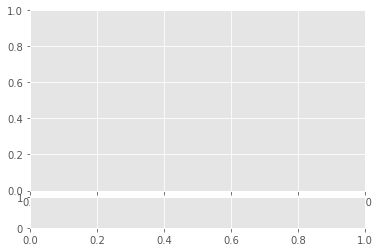

In [9]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)

In [12]:
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [20]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [21]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [22]:
df_volume = df['Volume'].resample('10D').sum()

In [23]:
print(df_ohlc.head())

                  open        high         low       close
Date                                                      
2019-12-31  418.329987  492.140015  418.329987  481.339996
2020-01-10  478.149994  537.919983  478.149994  510.500000
2020-01-20  547.200012  580.989990  547.200012  580.989990
2020-01-30  640.809998  887.059998  640.809998  748.070007
2020-02-09  771.280029  858.400024  767.289978  858.400024


In [24]:
df_ohlc = df_ohlc.reset_index()

In [25]:
df_ohlc['Date'] = df_ohlc['Data'].map(madtes.date2num)

KeyError: 'Data'